## Task 1 : Data Analysis

The key aspect of ride-hailing is upfront pricing, which works as the following way:
First, it predicts the price for a ride based on predicted distance and time. This price is what you see on the screen of the phone before ordering a ride. Second, if the metered price based on actual distance and time differs a lot from the predicted one, the upfront price switches to the metered price. 'A lot' means more than 20%. For example, suppose you want to make a ride that upfront price predicts a cost of 5 euros. If the metered price is between 4 and 6 euros, you will end up paying 5 euros. You will end up paying something else if the metered price is anything less than 4 or more than 6 euros.
No customer likes surprises (especially when it comes to money!), that’s why we always strive to improve our upfront pricing precision for our customers’ smooth journeys.
In the attached file you will find a sample data test.csv. Your task is to analyze this data and identify the top 1 to 2 opportunities that can help us improve upfront pricing precision. The expected output is
A business PDF report (2 pages maximum). Assume that both business and technical people will read your results.
A Jupyter notebook (using Python or SQL) as a result.

We expect you to spend less than 8 hours on the task.

Variables in the file:
order_id_new, order_try_id_new - id of an order
calc_created- time when the order was created
metered_price, distance, duration- actual price, distance and duration of a ride
upfront_price- promised to the rider price, based on predicted duration (predicted_duration) and distance (predicted_distance)
distance - ride distance
duration - ride duration
gps_confidence- indicator for good GPS connection (1 - good one, 0 - bad one)
entered_by- who entered the address
b_state- state of a ride (finished implies that the ride was actually done)
dest_change_number- number of destination changes by a rider and a driver. It includes the original input of the destination by a rider. That is why the minimum value of it is 1
predicted distance - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car
predicted duration - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car
prediction_price_type- internal variable for the type of prediction:
upfront, prediction - prediction happened before the ride
upfront_destination_changed - prediction happened after rider changed destination during the ride
change_reason_pricing - indicates whose action triggered a change in the price prediction. If it is empty, it means that either nobody changed the destination or that the change has not affected the predicted price
ticket_id_new - id for customer support ticket
device_token, device_token_new - id for a device_token (empty for all the fields)
rider_app_version - app version of rider phone
driver_app_version- app version of driver phone
driver_device_uid_new - id for UID of a phone device
device_name- the name of the phone
eu_indicator- whether a ride happens in EU
overpaid_ride_ticket- indicator for a rider complaining about the overpaid ride
fraud_score- fraud score of a rider. The higher it is the more likely the rider will cheat. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv("Test.csv - test.csv")
data.head()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4943 non-null   int64  
 1   order_try_id_new       4943 non-null   int64  
 2   calc_created           4943 non-null   object 
 3   metered_price          4923 non-null   float64
 4   upfront_price          3409 non-null   float64
 5   distance               4943 non-null   int64  
 6   duration               4943 non-null   int64  
 7   gps_confidence         4943 non-null   int64  
 8   entered_by             4943 non-null   object 
 9   b_state                4943 non-null   object 
 10  dest_change_number     4943 non-null   int64  
 11  prediction_price_type  4923 non-null   object 
 12  predicted_distance     4923 non-null   float64
 13  predicted_duration     4923 non-null   float64
 14  change_reason_pricing  298 non-null    object 
 15  tick

In [28]:
print("Start date of data {}".format(min(pd.to_datetime(data['calc_created']))))
print("End date of data {}".format(max(pd.to_datetime(data['calc_created']))))

Start date of data 2020-02-02 00:01:16
End date of data 2020-03-13 23:52:07


In [4]:
data.describe()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,device_token,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score
count,4943.000000,4943.000000,4923.000000,3409.000000,4943.000000,4943.000000,4943.000000,4943.000000,4923.000000,4923.000000,4943.000000,0.0,4943.000000,4943.000000,4943.000000,2184.000000
mean,2061.074449,2061.074044,7998.471296,4160.095747,9769.223144,1566.230629,0.800728,1.119361,8822.636807,1106.737355,2471.000000,NaN,1093.311349,0.560388,0.068177,-674.046703
std,1199.298429,1199.299081,15815.850352,17015.711912,10912.426401,1650.329858,0.399493,0.499611,10548.801733,806.098535,1427.065521,NaN,626.408069,0.496390,0.252075,1119.189890
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-14225.000000
25%,1020.500000,1020.500000,5.380000,4.200000,3785.500000,604.000000,1.000000,1.000000,4130.500000,597.500000,1235.500000,NaN,561.500000,0.000000,0.000000,-826.500000
50%,2065.000000,2065.000000,13.350000,6.600000,7140.000000,1054.000000,1.000000,1.000000,6918.000000,939.000000,2471.000000,NaN,1088.000000,1.000000,0.000000,-278.500000
75%,3090.500000,3090.500000,10991.670000,4000.000000,11953.000000,1929.500000,1.000000,1.000000,10674.000000,1427.000000,3706.500000,NaN,1643.000000,1.000000,0.000000,-64.750000
max,4165.000000,4165.000000,194483.520000,595000.000000,233190.000000,22402.000000,1.000000,12.000000,353538.000000,20992.000000,4942.000000,NaN,2158.000000,1.000000,1.000000,49.000000


In [5]:
data.isna().sum()

order_id_new                0
order_try_id_new            0
calc_created                0
metered_price              20
upfront_price            1534
distance                    0
duration                    0
gps_confidence              0
entered_by                  0
b_state                     0
dest_change_number          0
prediction_price_type      20
predicted_distance         20
predicted_duration         20
change_reason_pricing    4645
ticket_id_new               0
device_token             4943
rider_app_version          16
order_state                 0
order_try_state             0
driver_app_version          0
driver_device_uid_new       0
device_name                 0
eu_indicator                0
overpaid_ride_ticket        0
fraud_score              2759
dtype: int64

#### the huge value of metered and upfront prices tell us that all the rides might not be in EU

In [6]:
data['eu_indicator'].value_counts()

1    2770
0    2173
Name: eu_indicator, dtype: int64

<AxesSubplot: ylabel='eu_indicator'>

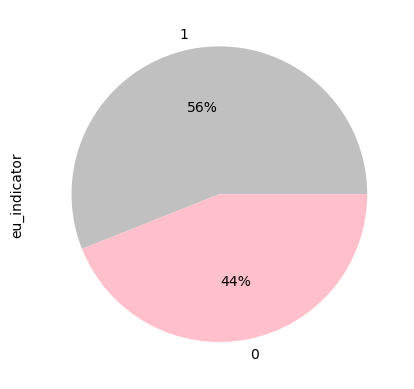

In [7]:
data['eu_indicator'].value_counts().plot(kind='pie',autopct='%1.0f%%',colors=['silver','pink'])

#### since the currency of non-eu rides is not known and it could be from any of the countries in Asia, Africa and Latin America where BOLT is operational therefore for now we just consider the ones in Europe

In [8]:
data_eu = data[data['eu_indicator']==1]

In [9]:
data_eu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770 entries, 0 to 4941
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           2770 non-null   int64  
 1   order_try_id_new       2770 non-null   int64  
 2   calc_created           2770 non-null   object 
 3   metered_price          2750 non-null   float64
 4   upfront_price          2527 non-null   float64
 5   distance               2770 non-null   int64  
 6   duration               2770 non-null   int64  
 7   gps_confidence         2770 non-null   int64  
 8   entered_by             2770 non-null   object 
 9   b_state                2770 non-null   object 
 10  dest_change_number     2770 non-null   int64  
 11  prediction_price_type  2750 non-null   object 
 12  predicted_distance     2750 non-null   float64
 13  predicted_duration     2750 non-null   float64
 14  change_reason_pricing  199 non-null    object 
 15  tick

In [10]:
data_eu.describe()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,device_token,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score
count,2770.000000,2770.000000,2750.000000,2527.00000,2770.000000,2770.000000,2770.000000,2770.000000,2750.000000,2750.000000,2770.000000,0.0,2770.000000,2770.0,2770.000000,2117.000000
mean,2129.225271,2129.221300,7.642164,6.43704,8923.785560,1052.596751,0.954152,1.165704,7941.451636,857.128364,2415.532130,NaN,1065.816606,1.0,0.004693,-672.659896
std,1195.681644,1195.684432,7.058966,5.00648,10875.421428,946.069432,0.209194,0.610177,9169.534783,551.266355,1440.657681,NaN,645.418084,0.0,0.068358,1123.900559
min,0.000000,0.000000,2.000000,2.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,0.000000,-14225.000000
25%,1128.250000,1128.250000,3.990000,3.70000,3742.750000,529.000000,1.000000,1.000000,3543.250000,513.000000,1119.250000,NaN,500.000000,1.0,0.000000,-808.000000
50%,2105.500000,2105.500000,5.895000,5.20000,6423.000000,842.500000,1.000000,1.000000,5825.000000,747.500000,2455.500000,NaN,1055.000000,1.0,0.000000,-280.000000
75%,3186.750000,3186.750000,8.790000,7.60000,10671.000000,1270.750000,1.000000,1.000000,9504.000000,1053.750000,3648.500000,NaN,1627.750000,1.0,0.000000,-70.000000
max,4165.000000,4165.000000,119.430000,93.80000,233190.000000,15618.000000,1.000000,12.000000,217444.000000,9893.000000,4938.000000,NaN,2158.000000,1.0,1.000000,49.000000


#### How many rides were actually completed? All

In [11]:
data_eu['b_state'].value_counts(normalize=True)

finished    1.0
Name: b_state, dtype: float64

#### There are around 20 entries for which metered price is null and 243 entries for which upfront price is null. Let's have a look at these separately first

In [12]:
data_null = data_eu[data_eu['metered_price'].isnull()]
data_null.describe()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,device_token,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score
count,20.000000,20.000000,0.0,0.0,20.000000,20.000000,20.000000,20.00000,0.0,0.0,20.000000,0.0,20.000000,20.0,20.0,2.00000
mean,1822.800000,1822.800000,NaN,NaN,7665.750000,1267.150000,0.900000,1.35000,NaN,NaN,2564.850000,NaN,1118.100000,1.0,0.0,-672.00000
std,1237.086416,1237.086416,NaN,NaN,6454.464044,1160.875589,0.307794,0.74516,NaN,NaN,1381.313421,NaN,540.064411,0.0,0.0,845.69971
min,5.000000,5.000000,NaN,NaN,0.000000,0.000000,0.000000,1.00000,NaN,NaN,299.000000,NaN,46.000000,1.0,0.0,-1270.00000
25%,856.750000,856.750000,NaN,NaN,3276.500000,521.000000,1.000000,1.00000,NaN,NaN,1581.250000,NaN,801.000000,1.0,0.0,-971.00000
50%,1404.000000,1404.000000,NaN,NaN,5106.000000,837.500000,1.000000,1.00000,NaN,NaN,2459.500000,NaN,1231.500000,1.0,0.0,-672.00000
75%,2772.750000,2772.750000,NaN,NaN,10533.250000,1830.000000,1.000000,1.25000,NaN,NaN,3448.250000,NaN,1448.250000,1.0,0.0,-373.00000
max,4113.000000,4113.000000,NaN,NaN,21997.000000,5041.000000,1.000000,4.00000,NaN,NaN,4904.000000,NaN,1965.000000,1.0,0.0,-74.00000


#### Let's see if this problem is related to app version - the plots below show that it is not because of the app version of either rider or driver as the rows with null values have random app version which includes the app version for majority data 

<AxesSubplot: >

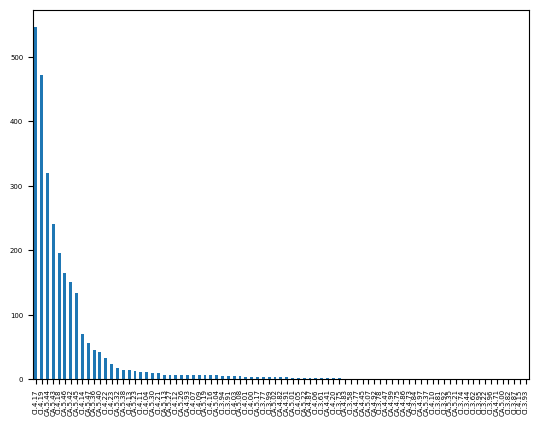

In [16]:
data_eu['rider_app_version'].value_counts().plot(kind='bar',fontsize=5)

<AxesSubplot: >

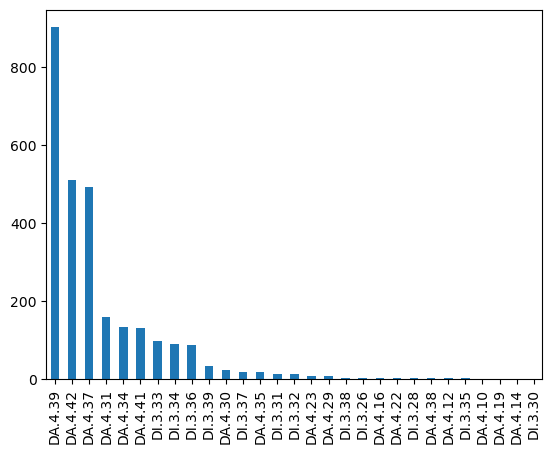

In [14]:
data_eu['driver_app_version'].value_counts().plot(kind='bar')

In [17]:
## analyzing remaining rows with upfront price null
data_null = data_eu[data_eu['upfront_price'].isnull()]
data_null.describe()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,device_token,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score
count,243.000000,243.000000,223.000000,0.0,243.000000,243.000000,243.000000,243.000000,223.000000,223.000000,243.000000,0.0,243.000000,243.0,243.000000,169.000000
mean,2142.432099,2142.432099,13.927444,NaN,16164.074074,1976.650206,0.786008,2.259259,10738.291480,991.426009,2372.106996,NaN,997.979424,1.0,0.016461,-553.644970
std,1223.986006,1223.986006,12.759444,NaN,21063.704439,1861.568122,0.410968,1.210605,16864.527538,850.120629,1485.912424,NaN,599.011820,0.0,0.127502,777.217445
min,2.000000,2.000000,2.380000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,64.000000,NaN,13.000000,1.0,0.000000,-4568.000000
25%,1030.500000,1030.500000,6.295000,NaN,5456.500000,869.500000,1.000000,2.000000,4135.000000,551.000000,945.000000,NaN,508.000000,1.0,0.000000,-660.000000
50%,2209.000000,2209.000000,9.180000,NaN,10278.000000,1412.000000,1.000000,2.000000,7384.000000,835.000000,2362.000000,NaN,929.000000,1.0,0.000000,-250.000000
75%,3313.000000,3313.000000,15.635000,NaN,17183.500000,2433.000000,1.000000,2.000000,12471.500000,1204.000000,3804.500000,NaN,1481.500000,1.0,0.000000,-58.000000
max,4160.000000,4160.000000,103.900000,NaN,233190.000000,15618.000000,1.000000,12.000000,217444.000000,9893.000000,4904.000000,NaN,2119.000000,1.0,1.000000,1.000000


In [18]:
data_eu['prediction_price_type'].value_counts()

upfront                        2550
upfront_destination_changed     195
upfront_waypoint_changed          4
prediction                        1
Name: prediction_price_type, dtype: int64

<AxesSubplot: title={'center': 'total upfront price per prediction type'}, xlabel='prediction_price_type'>

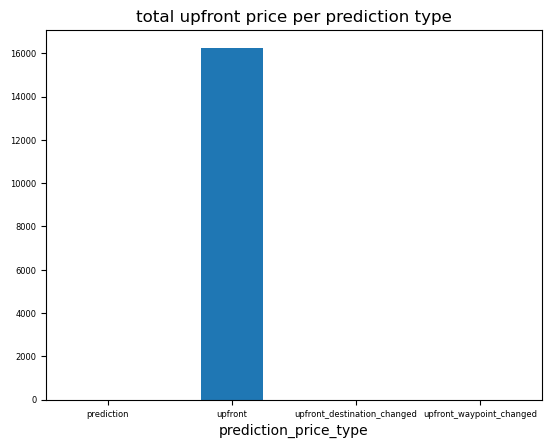

In [19]:
data_eu.groupby(['prediction_price_type'])['upfront_price'].sum().plot(kind='bar',rot=0,fontsize=6,title="total upfront price per prediction type")

#### the above plot shows upfront price was NULL whenever metered price was NULL and it was also NULL for all other prediction_price_type except for upfront

#### getting rid of the rows with null in metered and upfront price

In [20]:
data_eu = data_eu[~(data_eu['metered_price'].isnull())]
data_eu.describe()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,device_token,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score
count,2750.000000,2750.000000,2750.000000,2527.00000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,0.0,2750.000000,2750.0,2750.000000,2115.000000
mean,2131.453818,2131.449818,7.642164,6.43704,8932.934909,1051.036364,0.954545,1.164364,7941.451636,857.128364,2414.446182,NaN,1065.436364,1.0,0.004727,-672.660520
std,1195.320194,1195.323010,7.058966,5.00648,10901.181043,944.408561,0.208337,0.609047,9169.534783,551.266355,1441.264596,NaN,646.188230,0.0,0.068605,1124.281629
min,0.000000,0.000000,2.000000,2.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,0.000000,-14225.000000
25%,1130.750000,1130.750000,3.990000,3.70000,3753.000000,529.250000,1.000000,1.000000,3543.250000,513.000000,1115.750000,NaN,498.250000,1.0,0.000000,-807.000000
50%,2108.000000,2108.000000,5.895000,5.20000,6424.000000,842.500000,1.000000,1.000000,5825.000000,747.500000,2455.500000,NaN,1052.500000,1.0,0.000000,-280.000000
75%,3187.750000,3187.750000,8.790000,7.60000,10671.000000,1270.000000,1.000000,1.000000,9504.000000,1053.750000,3648.500000,NaN,1628.750000,1.0,0.000000,-70.000000
max,4165.000000,4165.000000,119.430000,93.80000,233190.000000,15618.000000,1.000000,12.000000,217444.000000,9893.000000,4938.000000,NaN,2158.000000,1.0,1.000000,49.000000


In [21]:
data_eu = data_eu[~(data_eu['upfront_price'].isnull())]
data_eu.describe()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,device_token,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score
count,2527.000000,2527.000000,2527.000000,2527.00000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,0.0,2527.000000,2527.0,2527.000000,1948.000000
mean,2127.955283,2127.950930,7.087507,6.43704,8227.548872,963.738425,0.970321,1.060546,7694.639098,845.277008,2419.707954,NaN,1072.339929,1.0,0.003562,-682.985113
std,1193.164222,1193.167279,6.010369,5.00648,9034.309963,747.735145,0.169735,0.376327,8108.993575,515.242253,1436.464064,NaN,649.443410,0.0,0.059584,1148.623231
min,0.000000,0.000000,2.000000,2.00000,0.000000,0.000000,0.000000,1.000000,21.000000,2.000000,0.000000,NaN,0.000000,1.0,0.000000,-14225.000000
25%,1142.000000,1142.000000,3.890000,3.70000,3665.000000,513.000000,1.000000,1.000000,3510.500000,509.500000,1131.500000,NaN,499.500000,1.0,0.000000,-828.500000
50%,2094.000000,2094.000000,5.650000,5.20000,6220.000000,800.000000,1.000000,1.000000,5751.000000,740.000000,2466.000000,NaN,1061.000000,1.0,0.000000,-280.000000
75%,3174.500000,3174.500000,8.350000,7.60000,10144.500000,1193.000000,1.000000,1.000000,9252.500000,1046.000000,3637.500000,NaN,1653.000000,1.0,0.000000,-70.000000
max,4165.000000,4165.000000,119.430000,93.80000,171119.000000,8889.000000,1.000000,7.000000,164512.000000,8544.000000,4938.000000,NaN,2158.000000,1.0,1.000000,49.000000


In [22]:
del data_null
data_eu.reset_index(inplace=True)

##### Based on the nature of our problem, let us analyze trend in metered price and upfront price

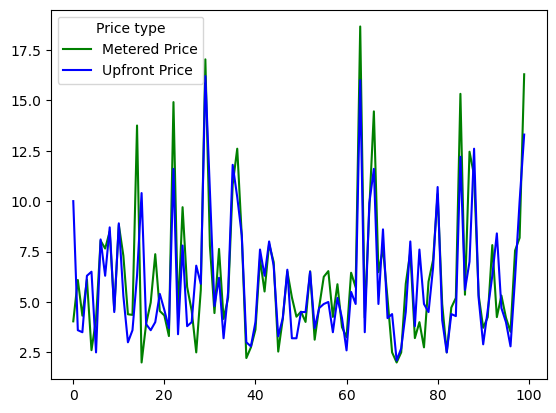

In [39]:
data_eu2 = data_eu.iloc[:100,:]
plt.plot(data_eu2["metered_price"],label="Metered Price",color="Green")
plt.plot(data_eu2["upfront_price"],label="Upfront Price",color = "Blue")

plt.legend(title="Price type")

plt.show()

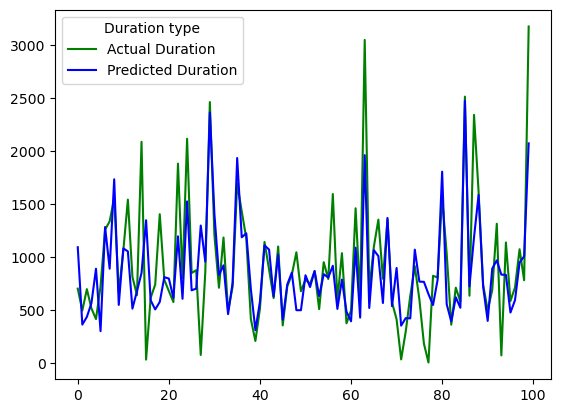

In [38]:
plt.plot(data_eu2["duration"],label="Actual Duration",color="Green")
plt.plot(data_eu2["predicted_duration"],label="Predicted Duration",color = "Blue")

plt.legend(title="Duration type")

plt.show()

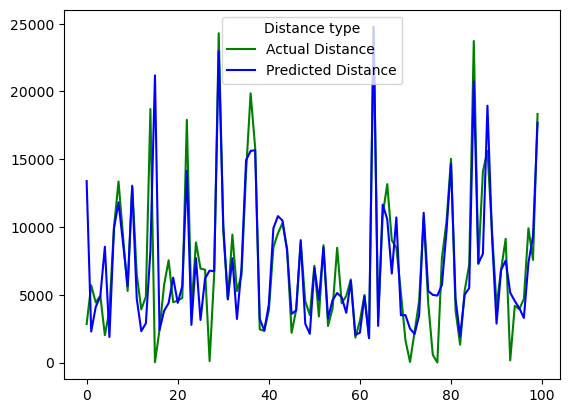

In [31]:
plt.plot(data_eu2["distance"],label="Actual Distance",color="Green")
plt.plot(data_eu2["predicted_distance"],label="Predicted Distance",color = "Blue")

plt.legend(title="Distance type")

plt.show()

<AxesSubplot: >

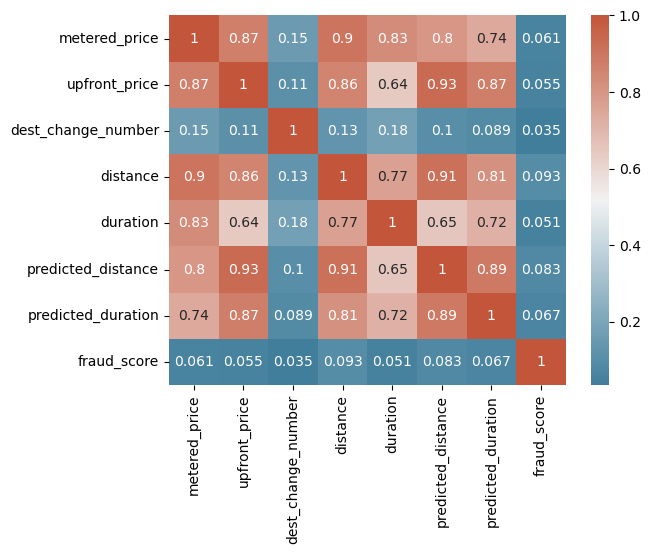

In [32]:
### let us study the correlation of these 6 variables with each other
corr = data_eu[['metered_price','upfront_price','dest_change_number','distance','duration','predicted_distance','predicted_duration','fraud_score']].corr()
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots()
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, cmap=cmap)

### Some Important Insights from the heatmap above

#### 1. Since predicted distance and predicted duration are strongly correlated therefore it might not be good idea to use both of these in our price prediction model (multicollinearity)

#### 2. the strong correlation of predicted duration and predicted distance with upfront_price, as well as the strong correlation of the duration and distance with metered_price indicates that we need to optimize our predicted duration and predicted distance to get the right upfront price. 

#### 3. the actual distance is much strongly correlated to p.distance and p.duration as compared to actual duration which means that we need to work more on the prediction of duration  

### for how many rides destination was changed with what affect on price

In [40]:
data_ds_changed = data_eu[data_eu['dest_change_number']>1]
data_ds_changed

,index,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
18,32,2056,2056,2020-02-21 18:11:08,7.37,4.0,7544,1403,0,client,...,NaN,CI.4.19,finished,finished,DA.4.37,1133,HUAWEI POT-LX1,1,0,-808.0
22,37,3546,3546,2020-03-07 23:28:20,14.91,11.6,17902,1881,1,driver,...,NaN,CI.4.19,finished,finished,DA.4.42,631,HUAWEI ATU-L21,1,0,-274.0
63,130,2534,2534,2020-02-26 9:32:09,18.66,16.0,24728,3050,1,driver,...,NaN,CI.4.19,finished,finished,DA.4.39,669,Samsung SM-G975F,1,0,-128.0
66,135,3425,3425,2020-03-06 22:59:47,14.45,11.6,13161,1352,1,client,...,NaN,CI.4.19,finished,finished,DA.4.42,1274,HUAWEI SNE-LX1,1,0,-124.0
79,164,3564,3564,2020-03-08 1:41:45,7.08,6.7,10354,805,1,client,...,NaN,CI.4.19,finished,finished,DA.4.42,673,Samsung SM-A500FU,1,0,-175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,4663,4073,4073,2020-03-13 9:44:45,9.79,7.8,13204,1421,1,driver,...,NaN,CA.5.47,finished,finished,DA.4.42,1135,Samsung SM-G960F,1,0,-940.0
2415,4734,2330,2330,2020-02-23 18:24:05,20.57,19.1,31338,2708,1,driver,...,NaN,CA.5.44,finished,finished,DA.4.39,1925,HUAWEI ANE-LX1,1,0,NaN
2438,4782,3095,3095,2020-03-03 7:10:17,7.29,10.8,3988,496,1,client,...,NaN,CI.4.19,finished,finished,DA.4.37,1546,HUAWEI SNE-LX1,1,0,NaN
2457,4821,837,837,2020-02-09 22:59:30,37.05,25.9,54308,4669,0,driver,...,NaN,CA.5.42,finished,finished,DA.4.39,38,Xiaomi MI 6X,1,0,-132.0


In [41]:
data_ds_changed['prediction_price_type'].value_counts()

upfront    80
Name: prediction_price_type, dtype: int64

#### the reason that there is only one category here regardless of the fact that the column 'prediction_price_type' has 4 categories (see below) is because te upfront price for all three other categories was 0 and those rows were removed by the filter ( for the removal of null upfront_price)

In [42]:
data['prediction_price_type'].value_counts()

upfront                        3432
prediction                     1279
upfront_destination_changed     208
upfront_waypoint_changed          4
Name: prediction_price_type, dtype: int64

### Now let's check if losing gps confidence results in an increased metered price/duration/distance
#### we will remove rows in which destination was changed so that it doesn't affect our gps result

In [43]:
bad_gps = data_eu[(data_eu['gps_confidence']==0) & (data_eu['dest_change_number']==1) ]

In [44]:
bad_gps['m>u'] = np.where(bad_gps["metered_price"]>(bad_gps["upfront_price"]+bad_gps["upfront_price"]*0.2),1,0)
bad_gps['m>u'].value_counts(normalize=True)

C:\Users\Yusra Shahid\AppData\Local\Temp\ipykernel_27832\375296833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_gps['m>u'] = np.where(bad_gps["metered_price"]>(bad_gps["upfront_price"]+bad_gps["upfront_price"]*0.2),1,0)


0    0.790323
1    0.209677
Name: m>u, dtype: float64

#### this means that when there is a bad gps signal, almost 20% of the time metered price is greater than upfront price

### In what percentage of data was  
### 1. metered_price > upfront price + 20% 
### 2. duration > predicted_duration + 20% and
### 3. distance > predicted_distance + 20% 

#### Removing destination change entries > 1 to avoid confusion

In [45]:
## how many metered prices are more than 20% of the upfront prices
data_eu2 = data_eu[data_eu['dest_change_number']==1]
comparison = pd.Series(np.where(data_eu2["metered_price"]>(data_eu2["upfront_price"]+data_eu2["upfront_price"]*0.2),1,0))
comparison.value_counts(normalize=True)

0    0.658766
1    0.341234
dtype: float64

#### ~34% times metered price is greater than 20% of the upfront price

In [46]:
## how many times duration is more than 20% of the predicted_duration
comparison = pd.Series(np.where(data_eu2["duration"]>(data_eu2["predicted_duration"]+data_eu2["predicted_duration"]*0.2),1,0))
comparison.value_counts(normalize=True)

0    0.669391
1    0.330609
dtype: float64

#### Similarily ~33% times actual duration is greater than 20% of the predicted duration

In [47]:
## how many times distance is more than 20% of the predicted_distance
comparison = pd.Series(np.where(data_eu2["distance"]>(data_eu2["predicted_distance"]+data_eu2["predicted_distance"]*0.2),1,0))
comparison.value_counts(normalize=True)

0    0.710257
1    0.289743
dtype: float64

#### And ~28% times actual distance is greater than 20% of the predicted distance

### Let's use the timestamp column and get day of the week and 3 time windows (8 hour each)

In [48]:
data_eu['calc_created'] = pd.to_datetime(data_eu['calc_created']) 

In [49]:
data_eu['day_of_week'] = data_eu['calc_created'].dt.day_name()
data_eu['day_of_week'].value_counts(normalize=True)

Friday       0.210131
Saturday     0.166205
Thursday     0.136130
Sunday       0.133360
Wednesday    0.130194
Tuesday      0.116739
Monday       0.107242
Name: day_of_week, dtype: float64

#### Here we divide 24 hours to 3 time windows of 8 hour each

In [50]:
data_eu['time_window'] = np.where((data_eu['calc_created'].dt.hour>=0) & (data_eu['calc_created'].dt.hour<8),1,
                                   np.where((data_eu['calc_created'].dt.hour>=8) & (data_eu['calc_created'].dt.hour<16),2,
                                           np.where((data_eu['calc_created'].dt.hour>=16) & (data_eu['calc_created'].dt.hour<=23),3,0)))
data_eu['time_window'].value_counts(normalize=True)

3    0.387416
2    0.340720
1    0.271864
Name: time_window, dtype: float64

#### Assuming a 6 hour time windows would give better insight we now divide 24 hours to 4 windows

In [52]:
data_eu['time_window'] = np.where((data_eu['calc_created'].dt.hour>=0) & (data_eu['calc_created'].dt.hour<6),'midnight',
                                   np.where((data_eu['calc_created'].dt.hour>=6) & (data_eu['calc_created'].dt.hour<12),'morning',
                                           np.where((data_eu['calc_created'].dt.hour>=12) & (data_eu['calc_created'].dt.hour<18),'afternoon',
                                                    np.where((data_eu['calc_created'].dt.hour>=18) & (data_eu['calc_created'].dt.hour<=23),'night','other'))))
data_eu['time_window'].value_counts(normalize=True)

afternoon    0.307083
night        0.265532
morning      0.253660
midnight     0.173724
Name: time_window, dtype: float64

#### Let us see what time of the day has highest average difference in actual and predicted duration

<AxesSubplot: xlabel='time_window'>

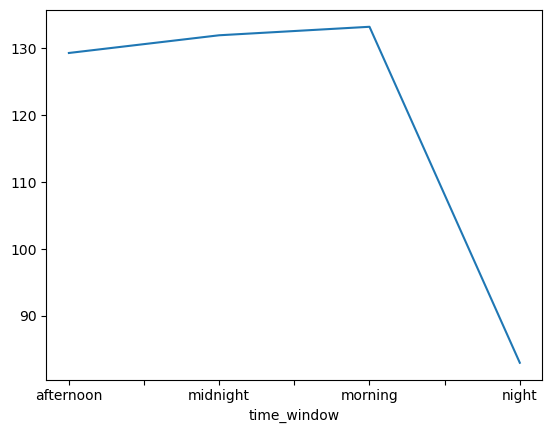

In [53]:
data_eu['diff_duration'] = data_eu['duration'].astype(float)-data_eu['predicted_duration'].astype(float)
data_eu.groupby(['time_window'])['diff_duration'].mean().plot()

C:\Users\Yusra Shahid\AppData\Local\Temp\ipykernel_27832\1788285996.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_eu.groupby(['time_window'])['distance_kms','duration_mins','metered_price'].mean().plot()


<AxesSubplot: xlabel='time_window'>

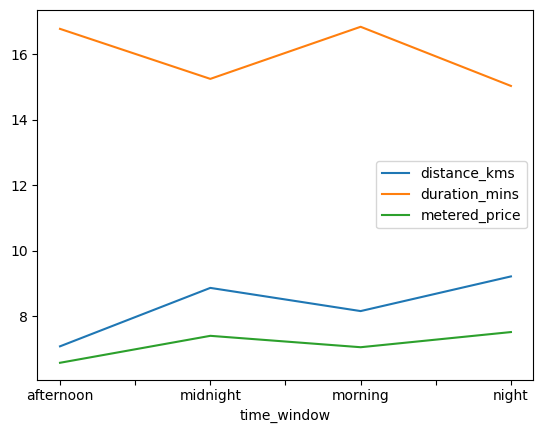

In [76]:
data_eu['distance_kms'] = data_eu['distance']/1000
data_eu['duration_mins'] = data_eu['duration']/60
data_eu.groupby(['time_window'])['distance_kms','duration_mins','metered_price'].mean().plot()

<AxesSubplot: xlabel='day_of_week'>

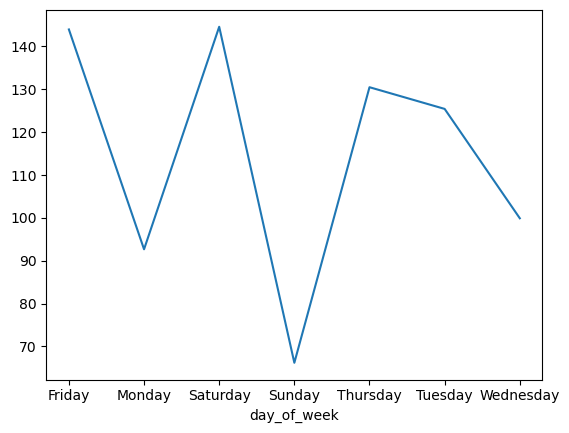

In [61]:
data_eu.groupby(['day_of_week'])['diff_duration'].mean().plot()

C:\Users\Yusra Shahid\AppData\Local\Temp\ipykernel_27832\4198722735.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_eu.groupby(['day_of_week'])['duration_mins','distance_kms','metered_price'].mean().plot()


<AxesSubplot: xlabel='day_of_week'>

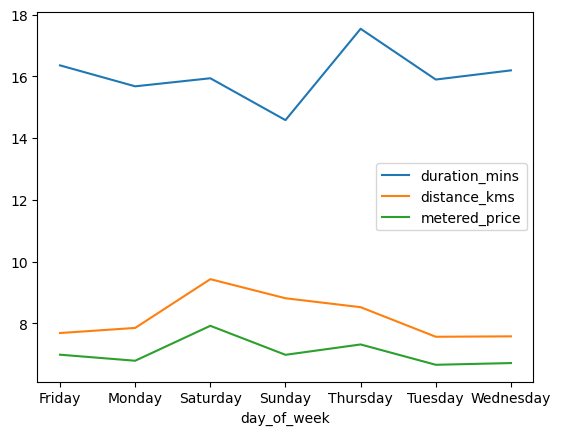

In [79]:
data_eu.groupby(['day_of_week'])['duration_mins','distance_kms','metered_price'].mean().plot()

C:\Users\Yusra Shahid\AppData\Local\Temp\ipykernel_27832\3291660340.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_eu.groupby(data_eu['calc_created'].dt.date)['duration_mins','predicted_duration_mins','distance_kms',


<AxesSubplot: title={'center': 'Sum of actual and predicted values'}>

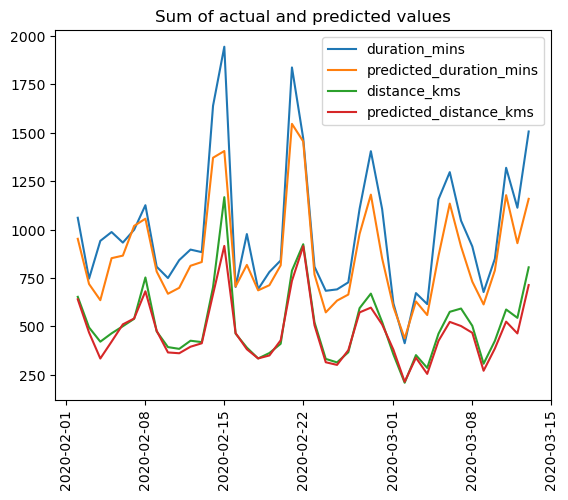

In [81]:
data_eu['predicted_duration_mins'] = data_eu['predicted_duration']/60
data_eu['predicted_distance_kms'] =data_eu['predicted_distance']/1000
data_eu.groupby(data_eu['calc_created'].dt.date)['duration_mins','predicted_duration_mins','distance_kms',
                                                 'predicted_distance_kms'].sum().plot(rot=90,title='Sum of actual and predicted values',xlabel='')

C:\Users\Yusra Shahid\AppData\Local\Temp\ipykernel_27832\1203620658.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_eu.groupby(data_eu['calc_created'].dt.date)['metered_price','upfront_price'].sum().plot(rot=90,title='Sum of actual and predicted values',xlabel='')


<AxesSubplot: title={'center': 'Sum of actual and predicted values'}>

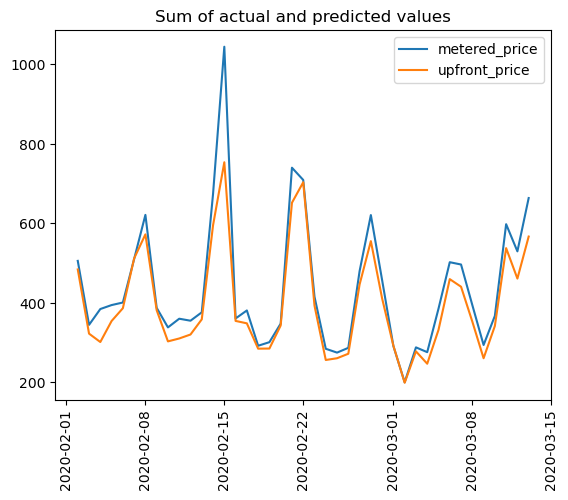

In [83]:
data_eu.groupby(data_eu['calc_created'].dt.date)['metered_price','upfront_price'].sum().plot(rot=90,title='Sum of actual and predicted values',xlabel='')

### Let's model our data to estimate metered price as target variable and predicted duration, predicted distance along with time window and day of the week as 4 predictors of the model.

#### we will be using decision tree algorithm for regression. In decision trees multicollinearity is not an issue when they are used for prediction purposes 

In [87]:
### bifurcating predictors and target variables
X = data_eu[['upfront_price','predicted_duration','predicted_distance','time_window','day_of_week']].values
Y = data_eu[['metered_price']].astype(float).values


In [104]:
def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [90]:
X_train, X_test, y_train, y_test = train_test_split( 
          X, Y, test_size = 0.2, random_state = 100)

In [105]:
mse(X_test[:,0],y_test)

42.0849988025101

In [ ]:
The Mean Square Error between Upfront price an

In [108]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
# fit the regressor with X and Y data
regressor.fit(X_train[:,1:3],y_train)

DecisionTreeRegressor(random_state=0)

In [109]:
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = regressor.predict(X_test[:,1:3])
  
# print the predicted price
result = pd.DataFrame()
result['predicted_metered_price'] = y_pred
result['actual_metered_price'] = y_test
result["actual upfront price in data"] = X_test[:,0]

In [101]:
result

,predicted_metered_price,actual_metered_price,actual upfront price in data
0,21.85,27.71,27.4
1,11.66,11.56,11.0
2,10.48,9.62,9.9
3,4.16,5.40,6.2
4,9.30,8.30,7.1
...,...,...,...
501,12.40,6.09,3.6
502,3.69,3.81,2.7
503,2.50,2.50,2.5
504,12.78,12.22,12.9


In [106]:
mse(y_test,y_pred)

48.16861498617382

In [103]:
X

array([[5.71874087e-04],
       [9.14413867e-02],
       [9.68347894e-02],
       [1.36937966e-01],
       [1.95273916e-01],
       [2.49767295e-01],
       [2.66812726e-01],
       [4.25221057e-01],
       [4.61692974e-01],
       [4.91734169e-01],
       [5.11672144e-01],
       [5.16130033e-01],
       [6.50142861e-01],
       [6.87373521e-01],
       [6.96381736e-01],
       [7.01934693e-01],
       [7.33642875e-01],
       [7.33779454e-01],
       [8.26770986e-01],
       [8.49152098e-01],
       [9.31301057e-01],
       [9.90507445e-01],
       [1.02226125e+00],
       [1.05814058e+00],
       [1.32773330e+00],
       [1.40221996e+00],
       [1.43887669e+00],
       [1.46807074e+00],
       [1.51166286e+00],
       [1.56712089e+00],
       [1.57757816e+00],
       [1.72780364e+00],
       [1.73882930e+00],
       [1.98383737e+00],
       [1.98838418e+00],
       [2.07027994e+00],
       [2.07089635e+00],
       [2.08511002e+00],
       [2.08652401e+00],
       [2.09597257e+00],
